In [9]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import os

SMALL, MED, LARGE, LW = 18, 24, 30, 3
plt.rc('axes', titlesize=MED)    # fontsize of the axes title
plt.rc('axes', labelsize=MED)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL)   # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL)   # fontsize of the tick labels
plt.rc('legend', fontsize=MED)   # legend fontsize
plt.rc('font', size=LARGE)         # controls default text sizes

file = os.getcwd() + "/tr_500k.monitor.csv"
print(file)
data = pd.read_csv(file, header=1)

data.policy_kwargs.replace({"{'net_arch': [{'pi': [10, 10], 'vf': [10, 10]}], 'optimizer_class': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer_kwargs': {'alpha': 0.99, 'eps': 1e-05, 'weight_decay': 0}}": '(10, 10)',
       "{'net_arch': [{'pi': [10, 10, 10], 'vf': [10, 10, 10]}], 'optimizer_class': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer_kwargs': {'alpha': 0.99, 'eps': 1e-05, 'weight_decay': 0}}": '(10, 10, 10)',
       "{'net_arch': [{'pi': [50, 50], 'vf': [50, 50]}], 'optimizer_class': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer_kwargs': {'alpha': 0.99, 'eps': 1e-05, 'weight_decay': 0}}": '(50, 50)',
       "{'net_arch': [{'pi': [50, 50, 50], 'vf': [50, 50, 50]}], 'optimizer_class': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer_kwargs': {'alpha': 0.99, 'eps': 1e-05, 'weight_decay': 0}}": '(50, 50, 50)', 
       "{'net_arch': [{'pi': [100, 100, 100], 'vf': [100, 100, 100]}], 'optimizer_class': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer_kwargs': {'alpha': 0.99, 'eps': 1e-05, 'weight_decay': 0}}": '(100, 100, 100)',
       "{'net_arch': [{'pi': [50, 50, 50, 50], 'vf': [50, 50, 50, 50]}], 'optimizer_class': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer_kwargs': {'alpha': 0.99, 'eps': 1e-05, 'weight_decay': 0}}": '(50, 50, 50, 50)',
       "{'net_arch': [{'pi': [100, 100, 100, 100], 'vf': [100, 100, 100, 100]}], 'optimizer_class': <class 'torch.optim.rmsprop.RMSprop'>, 'optimizer_kwargs': {'alpha': 0.99, 'eps': 1e-05, 'weight_decay': 0}}": '(100, 100, 100, 100)'}, inplace=True)

data.policy_kwargs.unique

/mnt/c/Users/git6f/Agar.io-bot/agar/data/tr_500k.monitor.csv


<bound method Series.unique of 0      (100, 100, 100)
1      (100, 100, 100)
2      (100, 100, 100)
3      (100, 100, 100)
4      (100, 100, 100)
            ...       
117    (100, 100, 100)
118    (100, 100, 100)
119    (100, 100, 100)
120    (100, 100, 100)
121    (100, 100, 100)
Name: policy_kwargs, Length: 122, dtype: object>

In [10]:
data['trial'] = data.step.cumsum() // 2_500_000
data

,r,l,t,step,agent mass,agent max mass,blobs,agars,policy_kwargs,trial
0,4.749631,34,2.880066,34,24.749631,24.824004,223,5,"(100, 100, 100)",0
1,2.451616,145,3.231067,145,22.451616,22.745442,284,4,"(100, 100, 100)",0
2,196.672687,3563,18.337426,3563,216.672687,234.804107,769,4,"(100, 100, 100)",0
3,45.467033,971,21.695438,971,65.467033,66.323316,494,5,"(100, 100, 100)",0
4,212.098716,11893,119.682958,11893,232.098716,829.602471,738,4,"(100, 100, 100)",0
...,...,...,...,...,...,...,...,...,...,...
117,44.071716,511,9183.857652,511,64.071716,64.200009,377,5,"(100, 100, 100)",0
118,5.796518,28,9183.916678,28,25.796518,25.805120,236,5,"(100, 100, 100)",0
119,976.275130,252941,10465.840310,252941,996.275130,2220.730255,525,3,"(100, 100, 100)",0
120,143.617179,644,10467.258309,644,163.617179,164.841882,349,4,"(100, 100, 100)",0


In [11]:
# data.groupby(['policy_kwargs', 'learning_rate']).max()

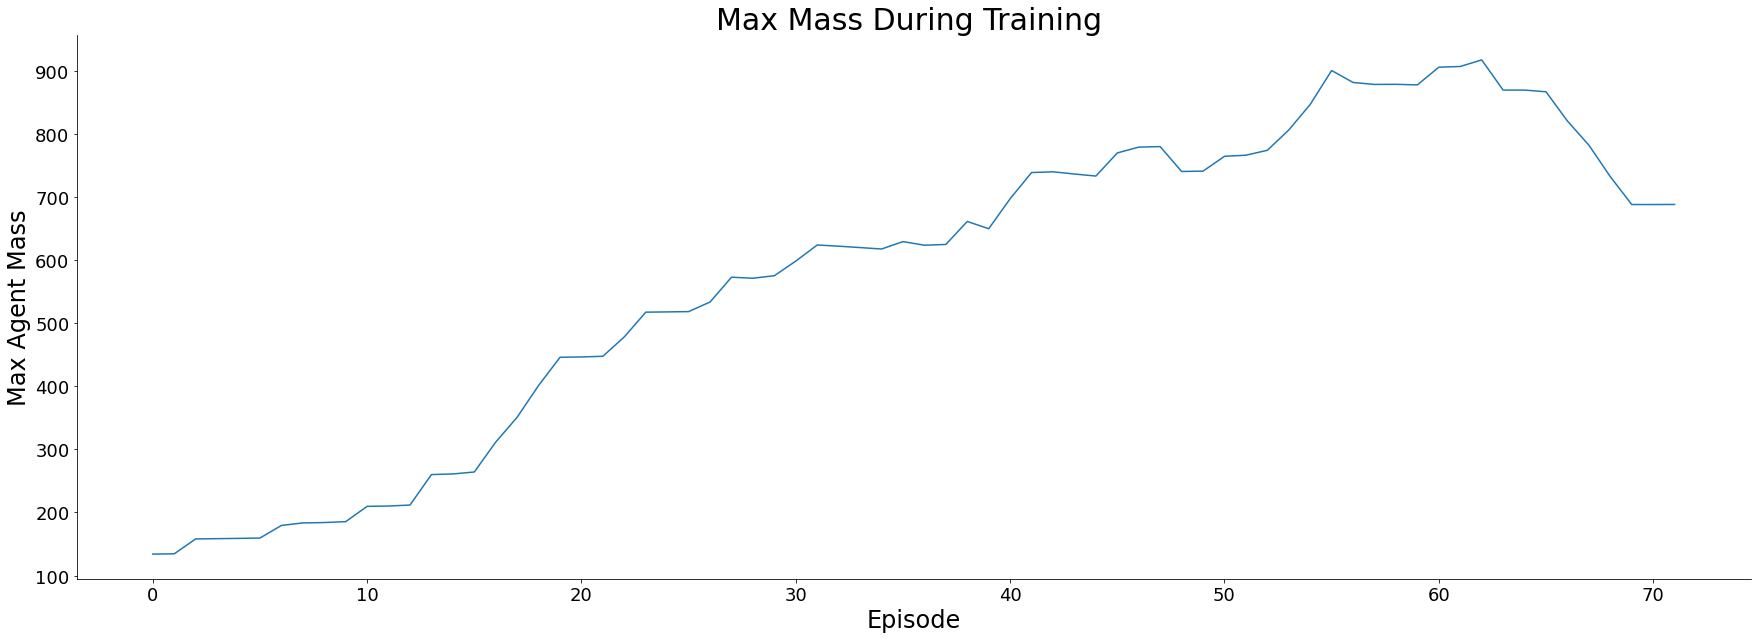

In [29]:
fig, ax = plt.subplots(figsize=(30, 10))

MAX_EP_REWARD = 242.07084202773154

reward = data.reset_index()['agent max mass']
smooth_param = 50

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

#for d in data.policy_kwargs:
#    print(d)
#ax.plot(smooth(reward, smooth_param)[:-smooth_param])

for trial in range(1):
    ax.plot(smooth(data[data.trial == trial].reset_index()['agent max mass'], smooth_param)[:-smooth_param])

# plt.axhline((MAX_EP_REWARD + 21.93) / 2)
# plt.axhline(MAX_EP_REWARD)
# plt.legend(frameon=False, fontsize=8)
        
ax.set_xlabel('Episode', fontsize=MED)
ax.set_ylabel('Max Agent Mass', fontsize=MED)
ax.set_title('Max Mass During Training ', fontsize=LARGE)
sns.despine()
plt.savefig('reward.png', dpi=2*fig.dpi)
plt.show()